<a href="https://colab.research.google.com/github/DKLavanya/CODSOFT/blob/main/CodSoft_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
# Load the dataset
url = '/content/IMDb Movies India (1).csv'  # Update with the correct path
data = pd.read_csv(url, encoding='latin1')  # Adjust encoding if necessary

In [4]:
# Display the first few rows of the dataframe
print(data.head())

                                 Name    Year  Duration            Genre  \
0                                         NaN       NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  2019.0     109.0            Drama   
2                         #Homecoming  2021.0      90.0   Drama, Musical   
3                             #Yaaram  2019.0     110.0  Comedy, Romance   
4                   ...And Once Again  2010.0     105.0            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  

In [5]:
print(data.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [6]:
imputer = SimpleImputer(strategy='mean')
data['Rating'] = imputer.fit_transform(data[['Rating']])

In [7]:
label_encoders = {}
for column in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:  # Update with actual column names
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column].astype(str))
    label_encoders[column] = le

In [8]:
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]  # Update with actual features
y = data['Rating']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.9550859439579924
R^2 Score: 0.007679587795524356


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

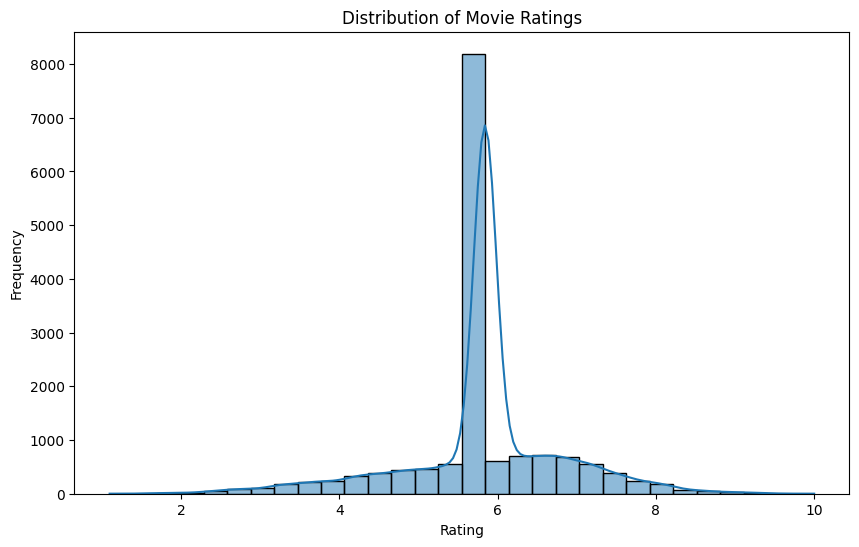

In [13]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

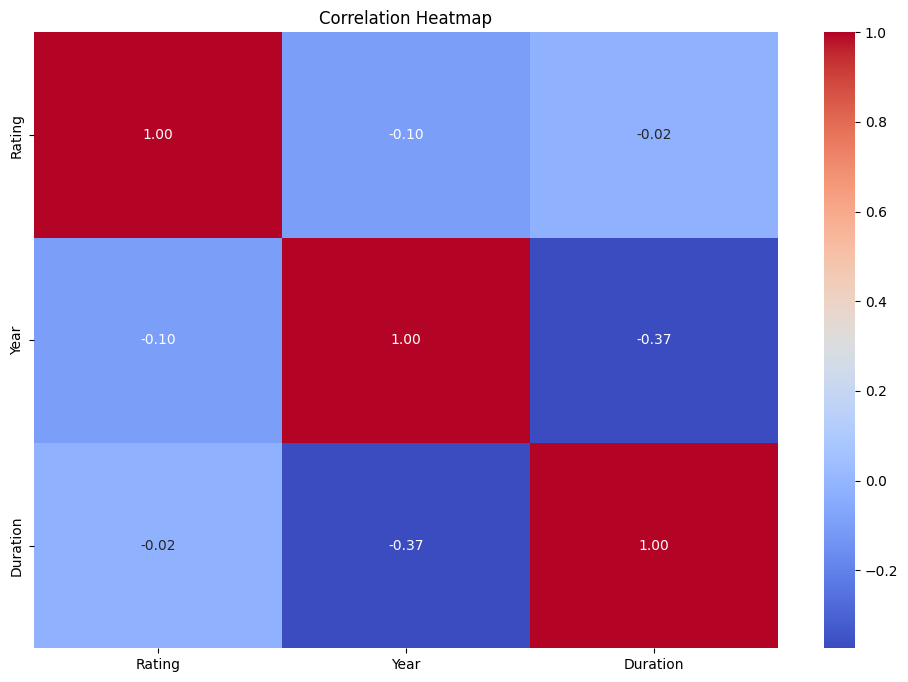

In [14]:
#Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[['Rating', 'Year', 'Duration']].corr()  # Add other numeric columns as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

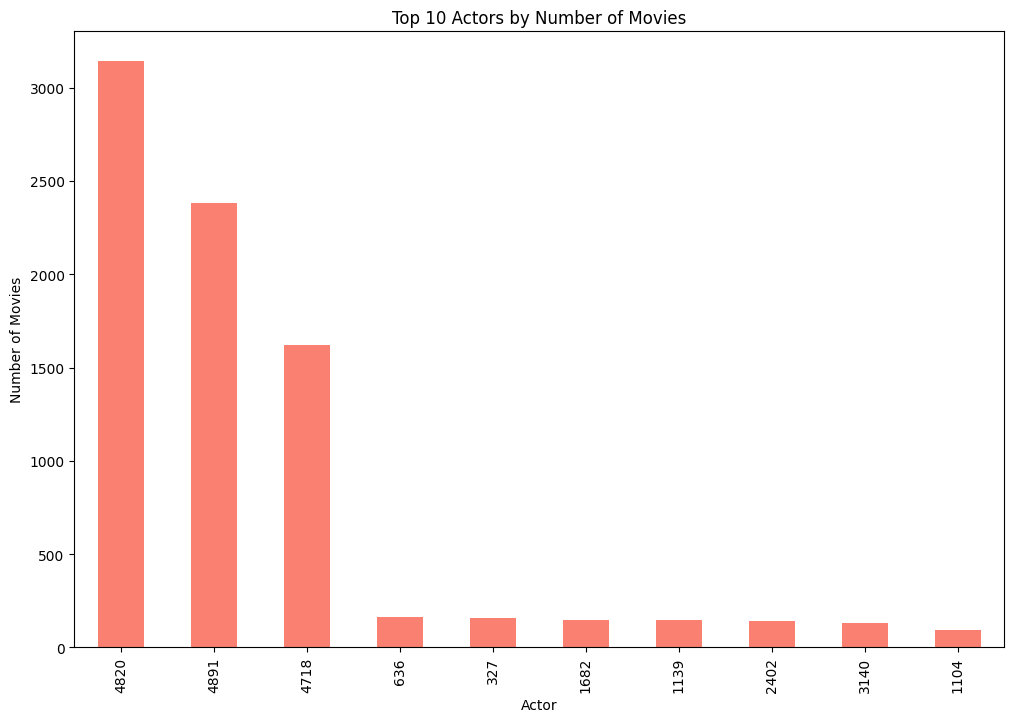

In [15]:
#Bar Plot
actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
actor_counts = actors.value_counts()
plt.figure(figsize=(12, 8))
actor_counts.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Actors by Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

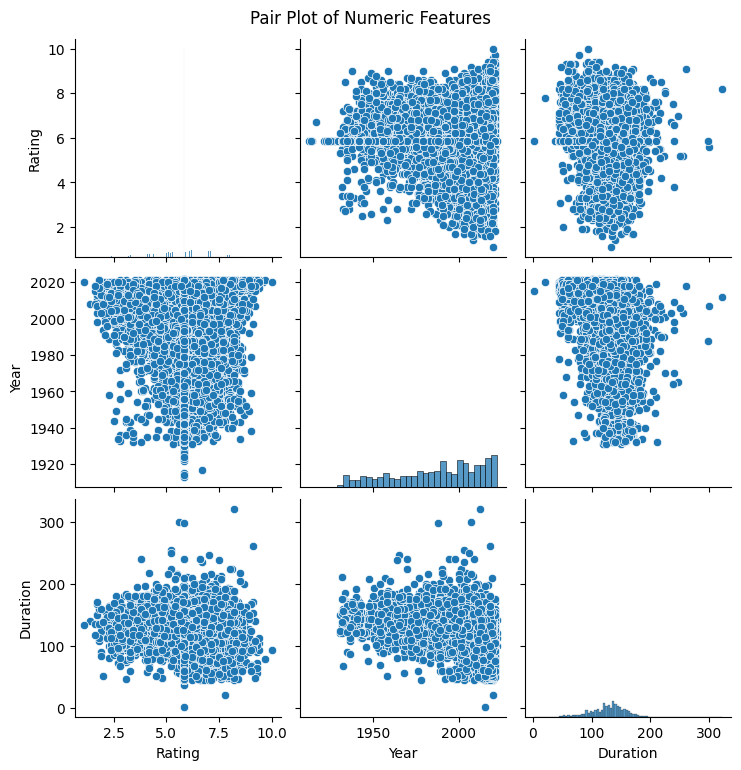

In [18]:
#Pair Plot
sns.pairplot(data[['Rating', 'Year', 'Duration']])
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

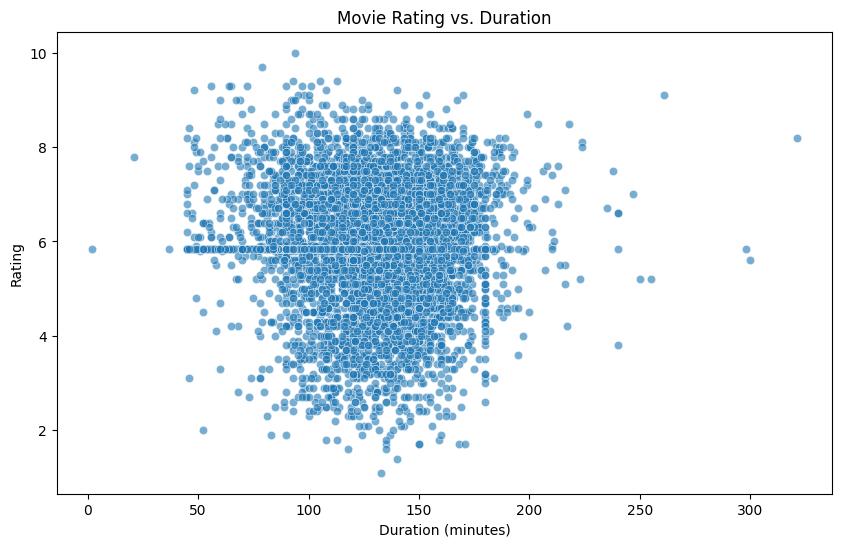

In [19]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=data, alpha=0.6)
plt.title('Movie Rating vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

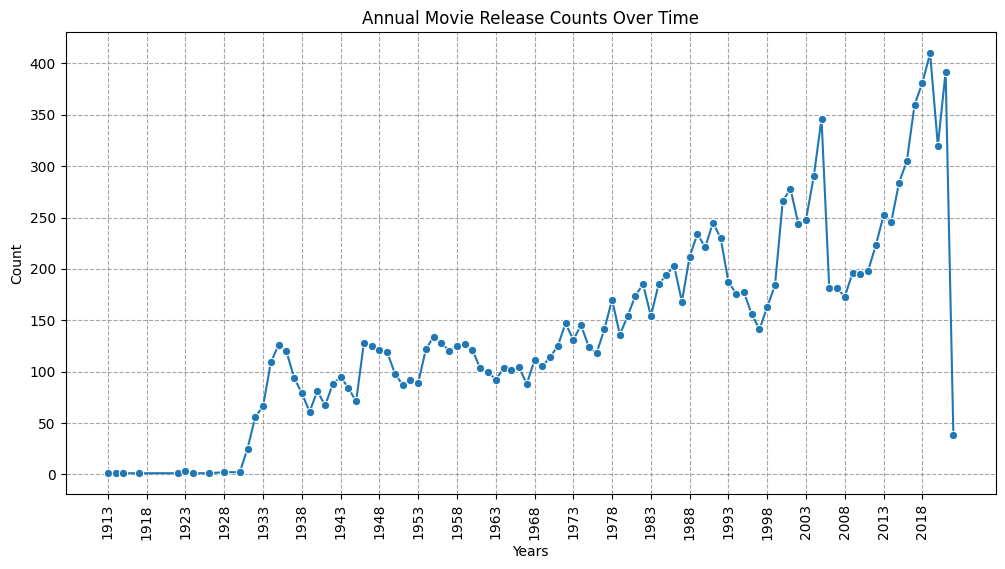

In [20]:
#Lineplot
data['Year'] = data['Year'].astype(str).str.extract('(\d+)', expand=False)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year'])
year_counts = data['Year'].astype(int).value_counts().sort_index()
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o')
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xlabel("Years")
ax.set_ylabel("Count")
plt.xticks(ticks=range(min(year_counts.index), max(year_counts.index) + 1, 5), rotation=90)
plt.grid(True, linestyle='--', color='gray', alpha=0.7)
plt.show()

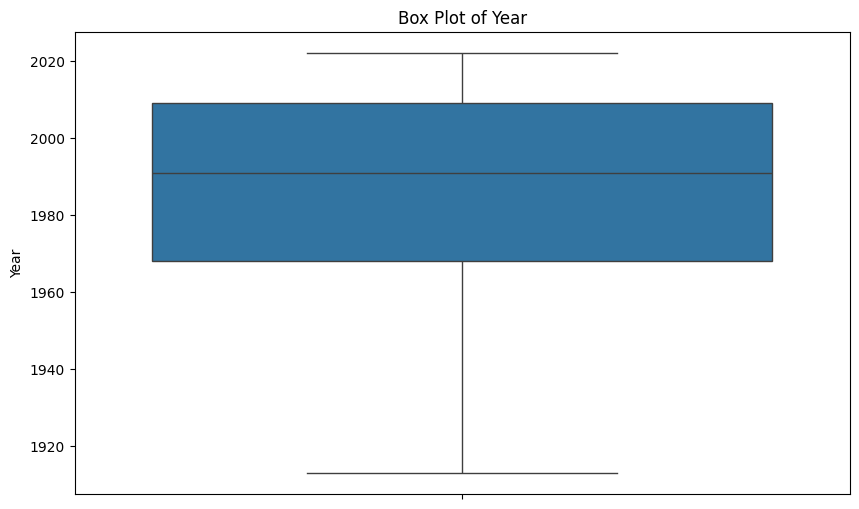

In [21]:
#Box Plot of Year
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y=data['Year'])
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
plt.show()